# Intro to Data Visualization

## Line Graphs and Time Series

**Exploratory data visualization**: we build graphs for ourselves to explore data and find patterns.

**Explanatory data visualization**: we build graphs for others to communicate and explain the patterns we've found through exploring data.

The `pyplot` submodule is a collection of high-level functions we can use to generate graphs very quickly.

In [ ]:
import matplotlib.pyplot as plt

The `plt.plot()` function generates a line graph by default. All it needs is two arrays of data of the same length — these can be Python lists, pandas Series, NumPy arrays, etc. The array that comes first gives the x-coordinates, and the second array gives the y-coordinates.

`plt.show()` displays all open figures

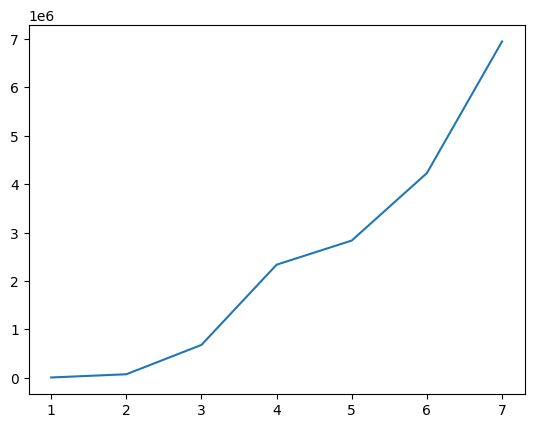

In [ ]:
month_number = [1, 2, 3, 4, 5, 6, 7]
new_cases = [9926, 76246, 681488, 2336640, 2835147, 4226655, 6942042]

plt.plot(month_number, new_cases)
plt.show()

On the top left side of the graph, we see an "1e6" sign — this is scientific notation. Matplotlib changes to scientific notation if one value on the axis needs to be one million or greater. If we want to remove scientific notation, we can use the `plt.ticklabel_format(axis, style)` function.

`plt.title()`: to add a title to our line graph.

`plt.xlabel()` & `plt.ylabel()`: To add label to the axis

Add a label argument to the `plt.plot()` function, and then we use the `plt.legend()` function

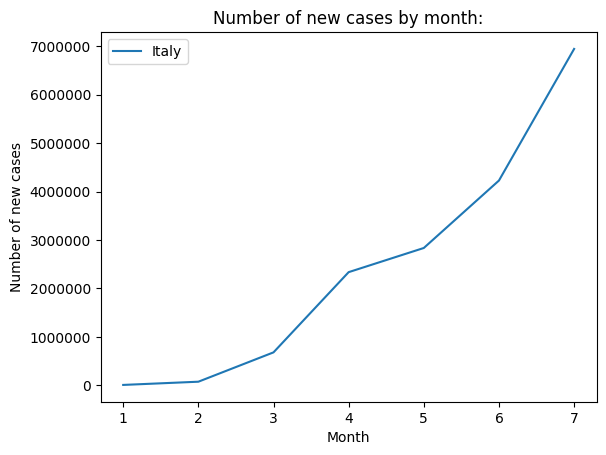

In [ ]:
plt.plot(month_number, new_cases, label='Italy')
plt.ticklabel_format(axis='y', style='plain')       # style : {'sci', 'scientific', 'plain'}
plt.title('Number of new cases by month:')
plt.xlabel('Month')
plt.ylabel('Number of new cases')
plt.legend()
plt.show()

When we use `plt.plot()` the first time, Matplotlib creates a line graph. When we use `plt.plot()` again, Matplotlib creates another line graph that shares the same x- and y-axis as the first graph. If we want Matplotlib to draw the second line graph separately, we need to use `plt.show()` after each `plt.plot()`

We call a series of data points that is listed in time order a **time series**. Typically we visualize time series with line graphs.

The **time** values are always plotted, by convention, on the **x-axis**.

**Types of Growth**

1. A quantity that increases constantly over time has **linear** growth.

2. A quantity that increases slowly in the beginning — but then starts growing faster and faster over time — has **exponential** growth.

3. In **logarithmic** growth, the quantity starts off with a slow rate of increase. As time progresses, the rate of increase becomes even slower, and this deceleration continues indefinitely. Unlike other forms of growth, such as logistic growth, which plateaus at a certain maximum limit or 'carrying capacity', logarithmic growth never reaches a finite upper limit. Instead, the quantity continues to increase gradually, even if the increments are infinitesimally small.

*Using cumulative data while plotting*

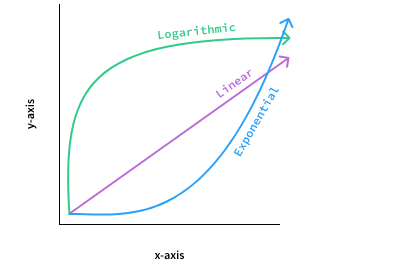

## Scatter Plots and Correlations

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

bike_sharing = pd.read_csv('day.csv')  # read from UCI ML Repo; Researcher Hadi Fanaee-T collected the dataset
bike_sharing['dteday'] = pd.to_datetime(bike_sharing['dteday'])

plt.plot(bike_sharing['dteday'], bike_sharing['casual'], label='Casual')
plt.plot(bike_sharing['dteday'], bike_sharing['registered'], label='Registered')

plt.xticks(rotation=30)
plt.ylabel('Bikes Rented')
plt.xlabel('Date')
plt.title('Bikes Rented: Casual vs. Registered')
plt.legend()
plt.show()

### Seasonality

 In time series data, we sometimes see specific patterns occurring regularly at specific intervals of time — we call this **seasonality**.

 Weather, holidays, school vacations and other factors can often cause seasonality. One popular example is ice-cream sales seasonality, which we can attribute to variations in air temperature: sales are high during summer and low during winter.

 Identifying seasonality can be useful for businesses:

1. They can plan marketing campaigns at the right time.
2. They don't need to panic needlessly when the sales are decreasing as a result of seasonality.
3. They can hire extra employees right before the period of high activity begins.


Biking is an outdoor activity, and people often don't ride when it's too cold outside — the wind feels very cold when you're moving.

By plotting 2 graphs with date in x axis and temperature and count of bike rented in y axis in each of graph, check the pattern in both graphs and confirm our hypothesis of increase in count in summer

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

bike_sharing = pd.read_csv('day.csv')
bike_sharing['dteday'] = pd.to_datetime(bike_sharing['dteday'])
plt.plot(bike_sharing['dteday'], bike_sharing['temp'])
plt.xticks(rotation=45)
plt.title('Evolution of Temperature')
plt.show()

plt.plot(bike_sharing['dteday'], bike_sharing['cnt'])
plt.xticks(rotation=45)
plt.title('Evolution of sales')
plt.show()

We see that when the temperature grows, the number of bike rentals tends to grow too. When the temperature decreases, the number of rentals tends to decrease too. Although the relationship isn't perfect, the values in the two columns follow similar patterns in how they change.

### Scatter Plot

Above, we plotted `cnt` and `temp` against `dteday`. To visualize the relationship between `cnt` and `temp`, it's better if we plot one against the other, and leave out the `dteday` column. We can do this with a **scatter plot** (also known as scatter graph or scatter chart).

It's created using the `plt.scatter()` function.

In [ ]:
plt.scatter(bike_sharing['temp'], bike_sharing['cnt'])
plt.xlabel('Temperature')
plt.ylabel('Bikes Rented')
plt.show()

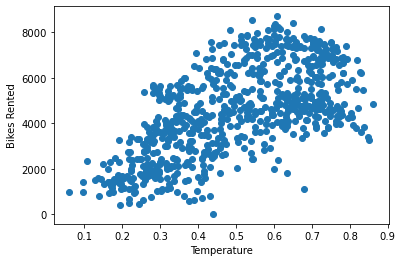

Each point (also called a **marker**) on the scatter plot has an x-coordinate and an y-coordinate. Above, the temp column provides the x-coordinates, and the cnt column provides the y-coordinates.

One thing we notice in the scatter plot above is that the overall direction of the points is upward (seen from left to right). This is because as the temperature increases, the number of bike rentals tends to grow too.

In a broad sense, when two columns are statistically related in a specific way and to a certain degree, we call this relationship **correlation**.

There are two kinds of correlation: positive and negative.

Two positively correlated columns tend to change in the same direction — when one increases (or decreases), the other tends to increase (or decrease) as well.

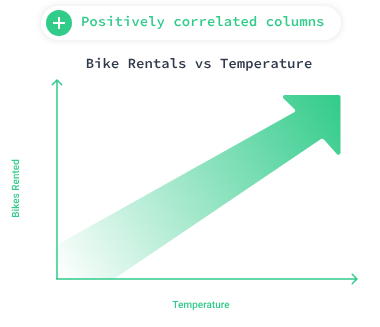

Two negatively correlated columns tend to change in opposite directions — when one increases, the other tends to decrease, and vice versa.

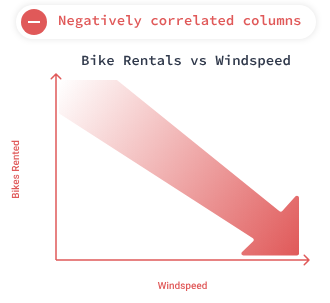

### Pearson Correlation Coefficient

The most popular way to measure correlation strength is by calculating the degree to which the points on a scatter plot fit on a straight line.

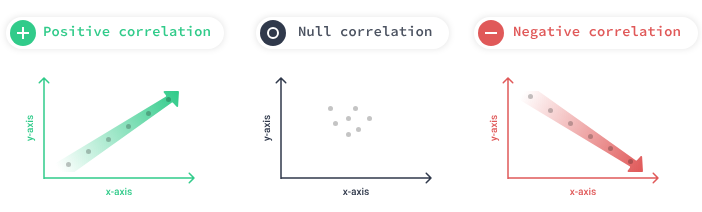

We can measure how well the points fit on a straight line by using the **Pearson correlation coefficient** — also known as **Pearson's r**.

Pearson's r values lie between -1.00 and +1.00. When the positive correlation is perfect, the Pearson's r is equal to +1.00. When the negative correlation is perfect, the Pearson's r is equal to -1.00. A value of 0.0 shows no correlation.

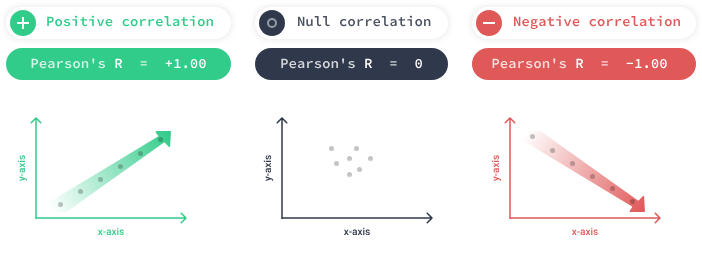

Below, we see various scatter plot shapes along with their corresponding Pearson's r.

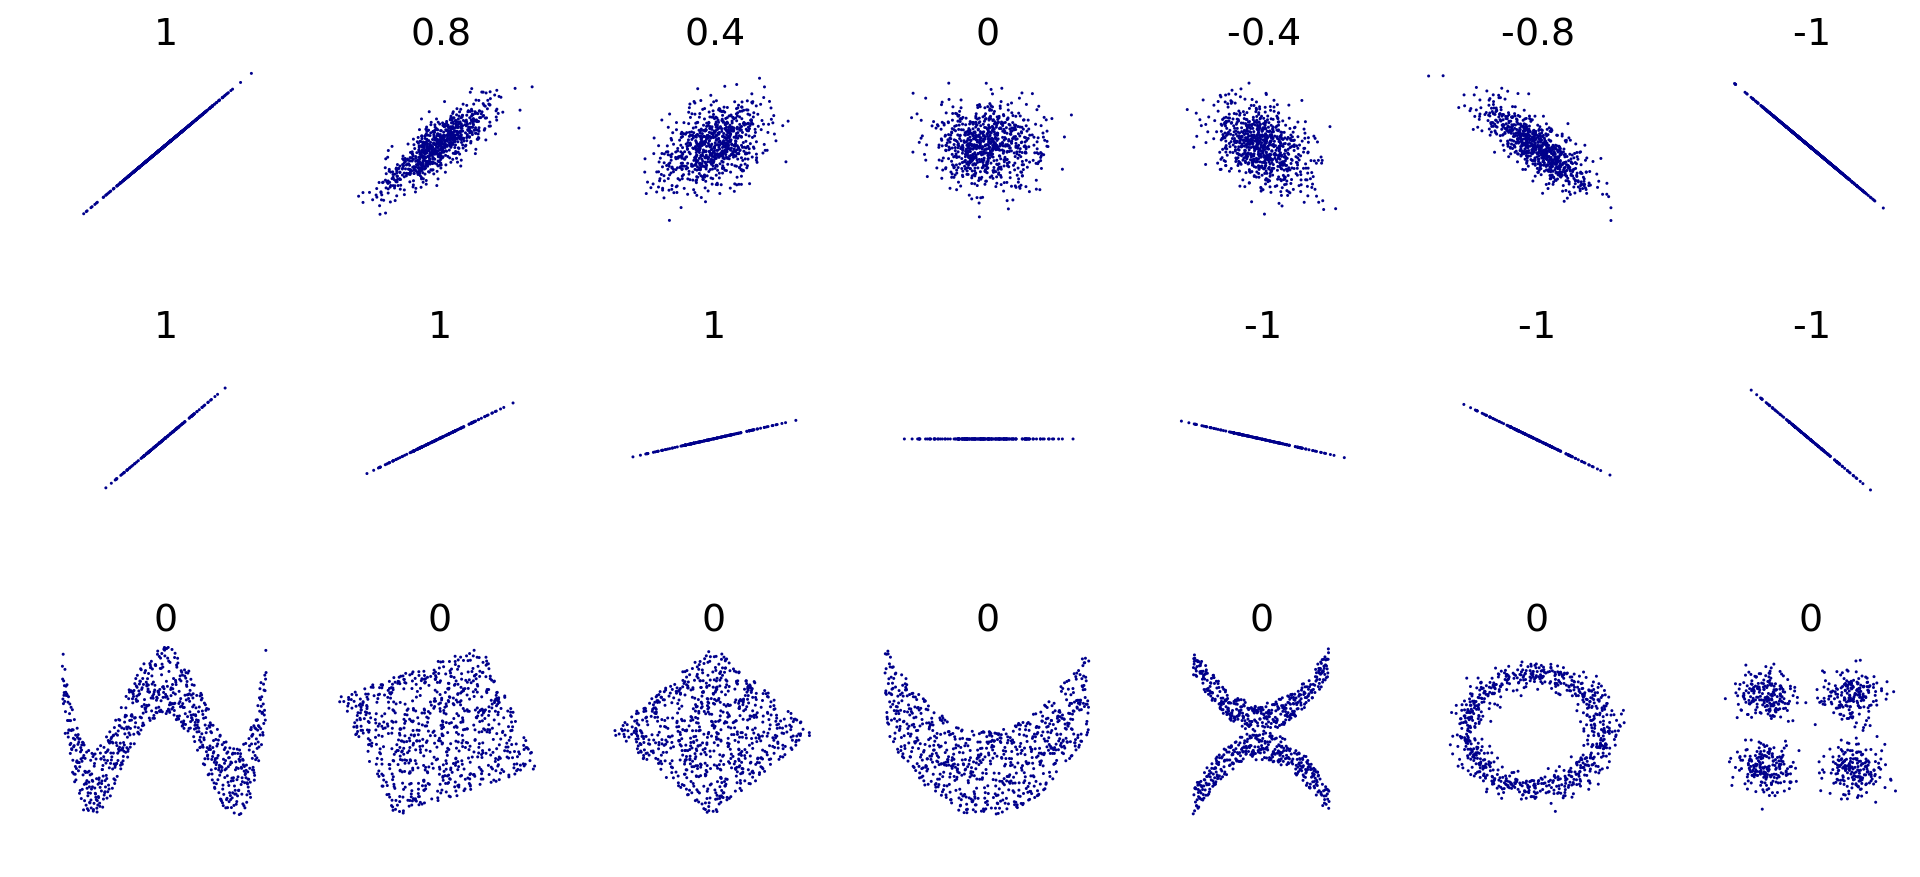

If columns X and Y have r = +0.8, and columns X and Z have r = -0.8, then the strength of these two correlations is equal. The minus sign only tells us that the correlation is negative, not that it is weaker.

When we compare correlation strengths, we need to ignore the signs and only look at the absolute r values. The sign only gives us the correlation's direction, not its strength.

To calculate the Pearson's r between any two columns, we can use the `Series.corr()` method.

In [ ]:
bike_sharing['temp'].corr(bike_sharing['cnt'])

0.6274940090334918

The order of columns doesn't matter when we use `Series.corr()`.

`Series.corr()` uses a math formula that only works with numbers. This means that `Series.corr()` only works with **numerical columns** — if we use string or datetime columns, we'll get an error.

We can get an overview of correlations using the `DataFrame.corr()` method, which calculates the Pearson's r between all pairs of numerical columns.

The `DataFrame.corr()` method returns a DataFrame, which means we can select the cnt, casual, and registered columns directly.

In [ ]:
bike_sharing.corr()[['cnt', 'casual', 'registered']]

### Categorical Columns

Generally, numerical columns describe a quantity — how much there is of something.

But we also have columns that describe qualities — what or how something is. These columns are categorical (or qualitative).

One example of a categorical column (also called categorical variable) is the `workingday` column. This column describes the type of day: a working day or a non-working day (weekend or holiday).

In [ ]:
bike_sharing['workingday'].value_counts()

1:    500;
0:    231

Name: workingday

dtype: int64

Although it's categorical, the workingday column is encoded with numbers (1 means a working day and 0 means a non-working day).

Because it's encoded with numbers, we can calculate correlations using `Series.corr()`. For instance, let's calculate its correlation with the casual and registered columns.

In [ ]:
bike_sharing.corr()['workingday'][['casual', 'registered']]

casual       -0.518044
registered    0.303907
Name: workingday, dtype: float64

We can see a negative correlation with the casual column (-0.52), and a positive correlation with the registered column (+0.30).

These values suggest that registered users tend to use the bikes more on working days (to commute to work probably), while casual (non-registered) users tend to rent the bikes more on the weekends and holidays (maybe to spend some leisure time).

However, the `1` and `0` encoding is arbitrary. The creators of this dataset could have assigned `0` to a working day and `1` to a non-working day. Below, we make this change ourselves:

In [ ]:
bike_sharing['workingday'].replace({1:0, 0:1}, inplace=True)

After we changed 1 to 0 and vice versa, the correlation strengths remained the same, but their sign changed (minus becomes plus and vice versa):

In [ ]:
bike_sharing.corr()['workingday'][['casual', 'registered']]

casual        0.518044
registered   -0.303907
Name: workingday, dtype: float64

If we are careful about what 1 and 0 mean, we reach the same conclusion as above (registered users tend to use the bikes more on working days, while casual users tend to ride the bikes more on the weekends and holidays).

The takeaway is that when we're working with categorical columns that have been encoded with numbers, we need to interpret the sign of the correlation with caution.

Because the encoding is arbitrary, the correlation can be both positive and negative, depending on how the creators of the dataset chose to encode the values of that column.

Often, the **best thing we can do is acknowledge that there's a correlation but avoid talking about the correlation as being positive or negative**.

### Correlation vs Causation

When we find a strong correlation between two columns, **one common mistake is to assume that the columns must also have a relationship of causality — one is the cause, and the other is the effect**.

For instance, let's say we found a strong positive correlation between the number of bike rentals and ice cream sales. When the number of bike rentals goes up, the number of ice cream sales tends to go up as well. When bike rentals decrease, ice cream sales tend to decrease too.

The positive correlation doesn't imply that ice cream sales are causing bike rentals to increase or decrease (or vice versa). **Most likely, both ice cream sales and bike rentals are related to temperature variations in a similar way, and this is why they change together similarly.**

However, correlation can suggest causality. If two columns are correlated, it might be because of a cause-and-effect relationship. It might. **To establish a relationship of causality, we often need to perform a rigorous experiment**.

The overarching point is that **proving causality requires more than just correlation**. We can't say that X is the cause of Y simply because columns X and Y are strongly correlated. In other words, **correlation does not imply causation.**

## Bar Plots, Histograms, and Distributions

### Vertical Bar Plot

Generate a bar plot using the `plt.bar()` function

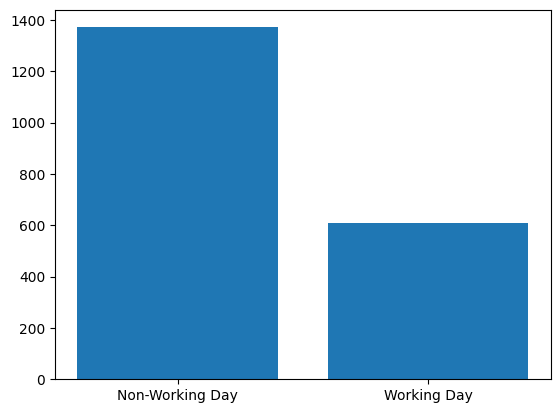

In [ ]:
import matplotlib.pyplot as plt

working_days = ['Non-Working Day', 'Working Day']
casual_avg = [1371, 607]

plt.bar(working_days, casual_avg)
plt.show()

In [ ]:
import pandas as pd

weekday_averages = pd.DataFrame({'weekday':[0,1,2,3,4,5,6],
                                'casual':[1338.295238,674.133333,556.182692,551.144231,590.961538,752.288462,1465.257143],
                                'registered':[2890.533333,3663.990476,3954.480769,3997.394231,4076.298077,3938.000000,3085.285714]})

weekday_averages

,weekday,casual,registered
0,0,1338.295238,2890.533333
1,1,674.133333,3663.990476
2,2,556.182692,3954.480769
3,3,551.144231,3997.394231
4,4,590.961538,4076.298077
5,5,752.288462,3938.000000
6,6,1465.257143,3085.285714


<function matplotlib.pyplot.show(close=None, block=None)>

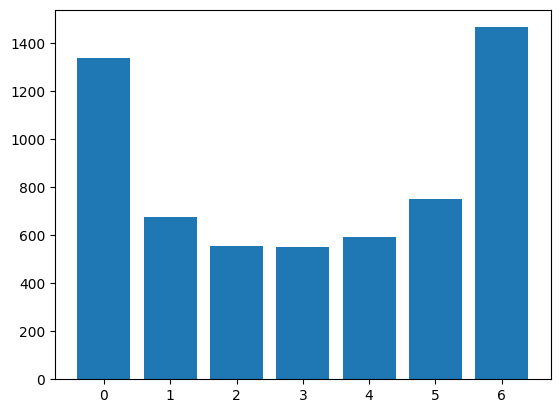

In [ ]:
plt.bar(weekday_averages['weekday'], weekday_averages['casual'])
plt.show

If we look at the `x-tick` labels, we only see numbers (from 0 to 6). If we wanted to add day names instead, we can use the `plt.xticks()` function. The `ticks` parameter takes in the x-coordinates, and the `labels` parameter takes in the corresponding new labels:

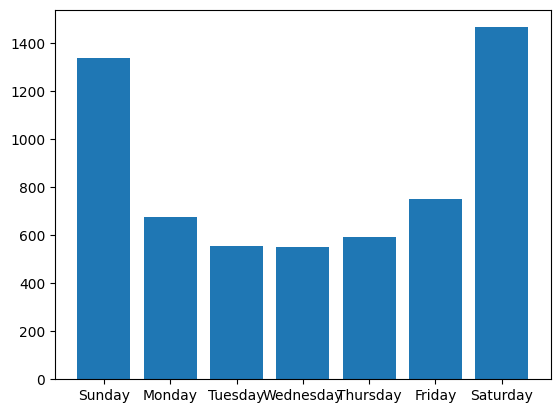

In [ ]:
plt.bar(weekday_averages['weekday'], weekday_averages['casual'])
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6],
          labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday',
                 'Thursday', 'Friday', 'Saturday'])
plt.show()

Some of the x-tick labels are now overlapping. One thing we can do is leverage the `rotation` parameter we learned about in the first lesson:

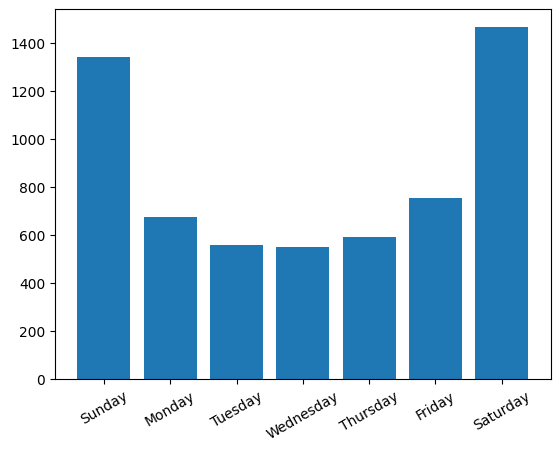

In [ ]:
plt.bar(weekday_averages['weekday'], weekday_averages['casual'])
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6],
          labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday',
                 'Thursday', 'Friday', 'Saturday'], rotation=30)
plt.show()

### Horizontal Bar Plot

To generate the **Horizontal bar plot** above, we can use the `plt.barh(y, width)` function along with the `plt.yticks()` function to change the y-tick labels:

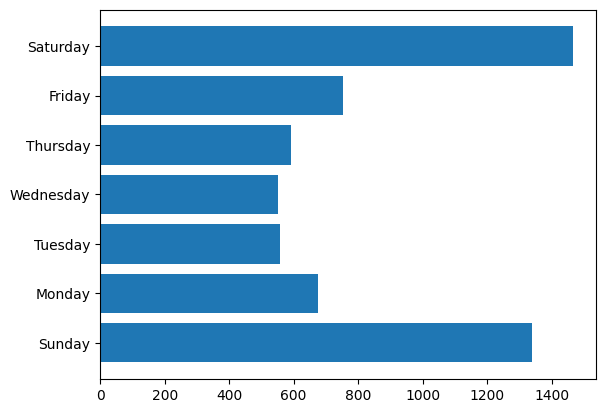

In [ ]:
plt.barh(weekday_averages['weekday'], weekday_averages['casual'])
plt.yticks(ticks=[0, 1, 2, 3, 4, 5, 6],
          labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday',
                 'Thursday', 'Friday', 'Saturday'])
plt.show()

### Frequency Table

We call the number of times that a unique value occurs the **frequency**.

More generally, the `Series.value_counts()` method returns a frequency table. The best way to visualize a frequency table is by using a bar plot.

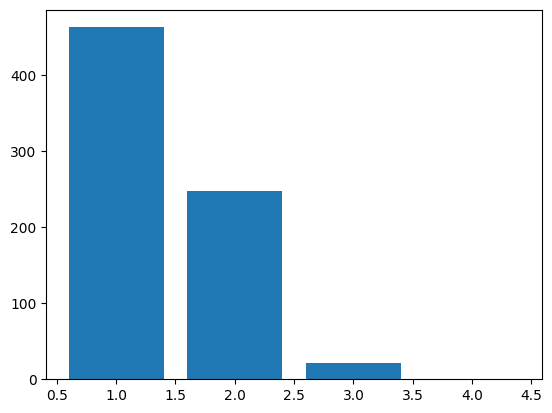

In [ ]:
weather_types = [1, 2, 3, 4]
frequencies = [463, 247, 21, 0]
plt.bar(weather_types, frequencies)
plt.show()

The best way to visualize a frequency table is by using a bar plot. **Bar plots work well when generating the frequency tables for categorical columns. For numerical columns, we need to use a histogram**.

Bar plots work especially well for visualizing frequency tables when the number of unique values is low.

If there are many unique values, then the bar plot looks too crowded, and it becomes more difficult to see any pattern - then we bin them and use Grouped Frequency Tables

### Grouped Frequency Tables

To solve this problem, we can group the unique values into equal intervals. Below, we group the table into ten equal intervals by using the bins=10 argument inside the `Series.value_counts()` method:

In [ ]:
bike_sharing['cnt'].value_counts(bins=10)

In [ ]:
"""
(4368.0, 5237.2]    137
(3498.8, 4368.0]    122
(5237.2, 6106.4]     81
(6975.6, 7844.8]     79
(6106.4, 6975.6]     76
(2629.6, 3498.8]     73
(1760.4, 2629.6]     71
(891.2, 1760.4]      62
(7844.8, 8714.0]     17
(13.307, 891.2]      13
Name: cnt, dtype: int64
"""

We can better understand the structure of the table above if we sort the intervals in ascending order.

In [ ]:
bike_sharing['cnt'].value_counts(bins=10).sort_index()

In [ ]:
"""
(13.307, 891.2]      13
(891.2, 1760.4]      62
(1760.4, 2629.6]     71
(2629.6, 3498.8]     73
(3498.8, 4368.0]    122
(4368.0, 5237.2]    137
(5237.2, 6106.4]     81
(6106.4, 6975.6]     76
(6975.6, 7844.8]     79
(7844.8, 8714.0]     17
Name: cnt, dtype: int64
"""

### Histograms

The best way to **visualize a grouped frequency table** is by using a **histogram**. To generate a histogram for our table above, we can use the `plt.hist() function`

In [ ]:
plt.hist(bike_sharing['cnt'])
plt.show()

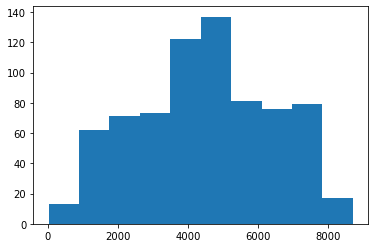

Notice that all we needed to pass to `plt.hist()` was the cnt column (not the grouped frequency table).

Behind the curtains, the `plt.hist()` function did the following:

1. Generated a grouped frequency table with ten equal intervals for the cnt column.

2. Plotted a bar for each interval (ten intervals means ten bars). The height of each bar corresponds to the frequency of its corresponding interval.

A histogram is a modified bar plot — the main visual difference is that there are no gaps between bars.

Another equally-important difference is that each bar represents an interval, not a single value.

#### Normal Distribution

A histogram shows the distribution of the values, and if its shape is symmetrical, then we say we have a symmetrical distribution.

One common symmetrical distribution is the normal distribution (also called Gaussian distribution).

A histogram shows the distribution of the values, and if its shape is symmetrical, then we say we have a symmetrical distribution.

One common symmetrical distribution is the normal distribution (also called Gaussian distribution).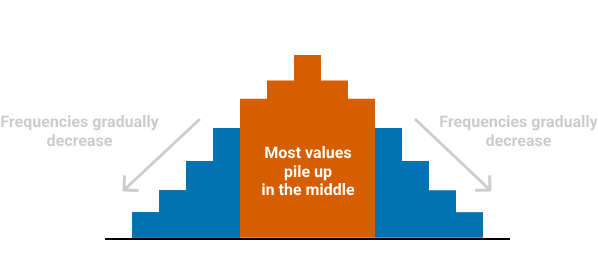

If we plot a histogram for this column and the visual result is a normal distribution, then this means the following:

1. Most of the values in that column lie in the middle of the range.
2. As we approach the minimum and the maximum points of the range, we have less and less of those values.

#### Uniform Distribution

Another symmetrical distribution we can see in practice is the uniform distribution — the values are uniformly distributed. The bars have equal height because the intervals have equal frequencies.

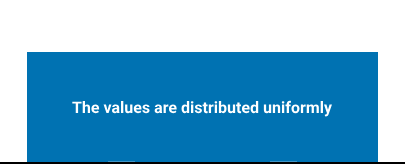

#### Skewed Distributions

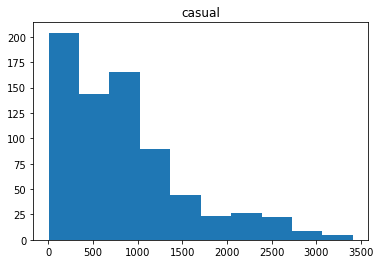

The casual histogram shows a **skewed distribution**. In a skewed distribution, we see the following:

1. The values pile up toward the end or the starting point of the range, making up the body of the distribution.
2. In the case of the casual histogram, the values pile up toward the starting point of the range.
3. Then the values decrease in frequency towards the opposite end, forming the tail of the distribution.


If the tail points to the right, then the distribution is right skewed (the distribution of the casual column is right skewed). If the tail points to the left, then the distribution is said to be left skewed.

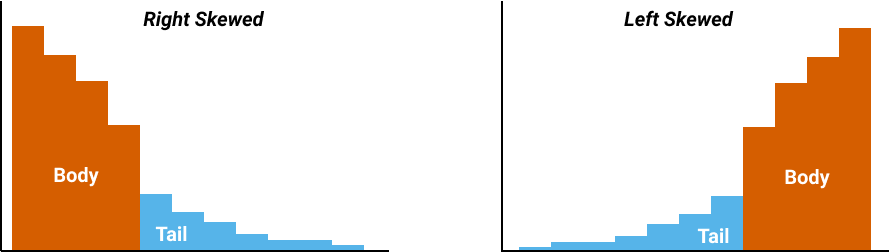

## Visualization with Pandas and Grid Charts

Equivalent of `plt.hist(list/series/numpy array)` in Pandas is `Series.plot.hist()`.

Matplotlib functions such as `plt.xlabel()` and others can be used to further customize.

The Pandas library has other useful visualization methods as well:


*   `Series.plot.bar()`: generates a vertical bar plot.
*   `Series.plot.barh()`: generates a horizontal bar plot.
*   `Series.plot.line()`: generates a line plot.  

`DataFrame.plot.line()` plots separate graphs by default, which means we won't be able to put all the lines on the same graph.





### Grid Charts

A **grid chart**, also called as a **small multiple** is a collection of similar graphs that usually share the same x- and y-axis range. The main purpose of a grid chart is to **ease comparison**.


1. To create a grid chart, we start by creating the larger figure where we will plot all the graphs — we use the `plt.figure()` function.

In [ ]:
print(plt.figure())

Figure(640x480)


<Figure size 640x480 with 0 Axes>

2. The second step is to create the first plot. You can also call the plots on a grid chart **subplots**. Let's use the `plt.subplot()` function to create our first plot:

We can change size of plots using `plt.figure(figsize=(width, height))`

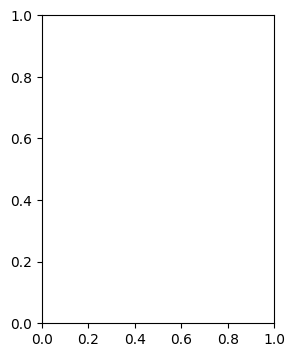

In [ ]:
plt.figure(figsize=(3,4))
plt.subplot()
plt.show()

The grid chart has a table like structure with rows and columns and is **indexed with number starting from 1**.

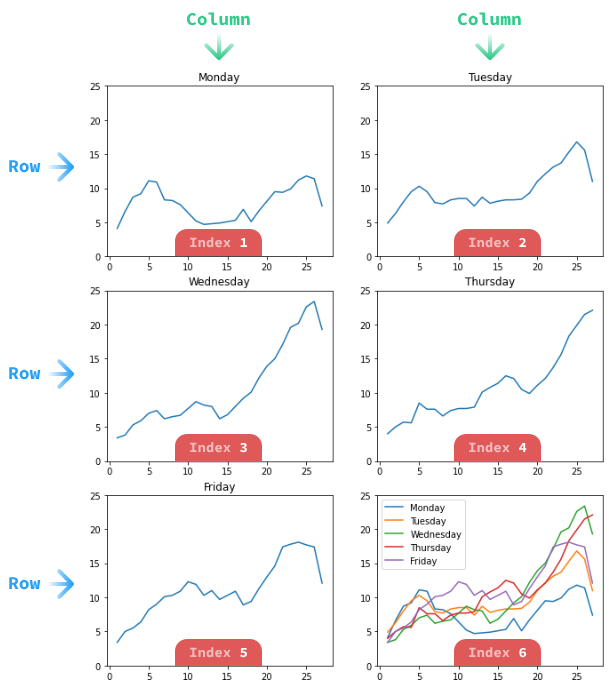

We can specify the number of rows and columns for our grid chart by using the `plt.subplot(nrows, ncols, index)` function. For instance, plt.subplot(3, 2, 1) means that we want to build the plot with index 1 on a grid chart that has 3 rows and 2 columns.

When we want to add another plot, we add another `plt.subplot()` function. Below, we add the sixth plot on the grid chart.



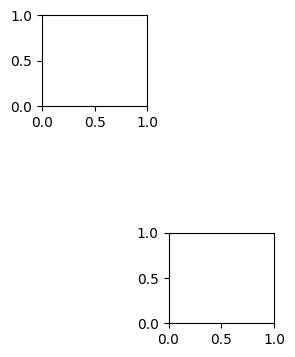

In [ ]:
plt.figure(figsize=(3,4))
plt.subplot(3,2,1)
plt.subplot(3,2,6)
plt.show()

Matplotlib allows us to customize the subplots individually. All the Matplotlib code under a certain `plt.subplot()` function is targeted towards the particular subplot that function generates.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

traffic = pd.read_csv('/content/traffic_sao_paulo.csv', sep=';')
traffic.head()

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"4,1"
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"6,6"
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"8,7"
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"9,2"
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"11,1"


In [ ]:
traffic['Slowness in traffic (%)'] = traffic['Slowness in traffic (%)'].str.replace(',', '.')
traffic['Slowness in traffic (%)'] = traffic['Slowness in traffic (%)'].astype(float)

In [ ]:
# saving dataframe of corresponding day in dictionary

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
traffic_per_day = {}
for i, day in zip(range(0, 135, 27), days):
    each_day_traffic = traffic[i:i+27]
    traffic_per_day[day] = each_day_traffic

The `zip()` function returns a zip object, which is an iterator of tuples where the first item in each passed iterator is paired together, and then the second item in each passed iterator are paired together etc.

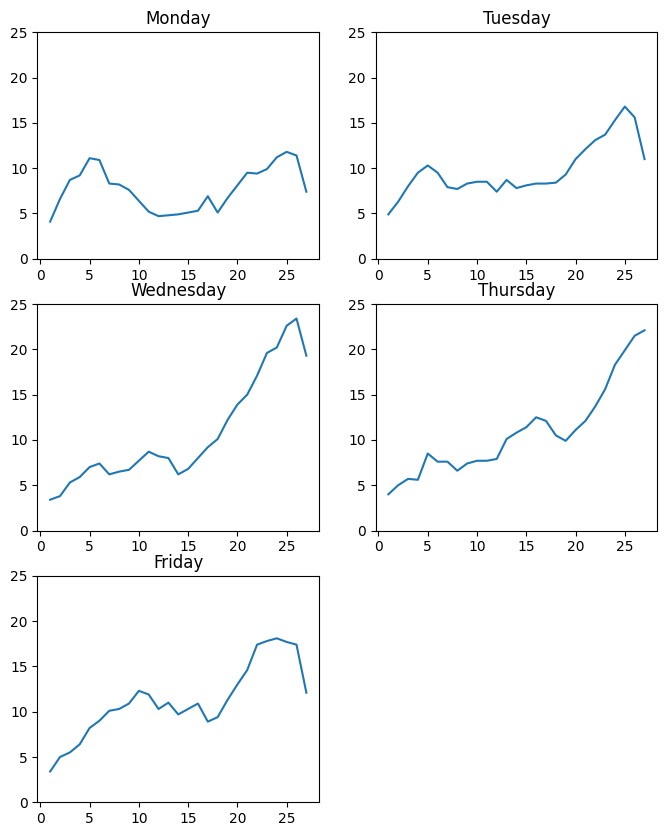

In [ ]:
plt.figure(figsize=(8,10))
for i, day in zip(range(1,6),days):
    plt.subplot(3,2,i)
    plt.plot(traffic_per_day[day]['Hour (Coded)'], traffic_per_day[day]['Slowness in traffic (%)'])
    plt.title(day)
    plt.ylim([0, 25])   # to ensure all subplots have same limits along y-axis

plt.show()

We have plotted the 5 plots of each day in above cell. In 6th cell, we plot lines of all days to compare the slowness in traffic.

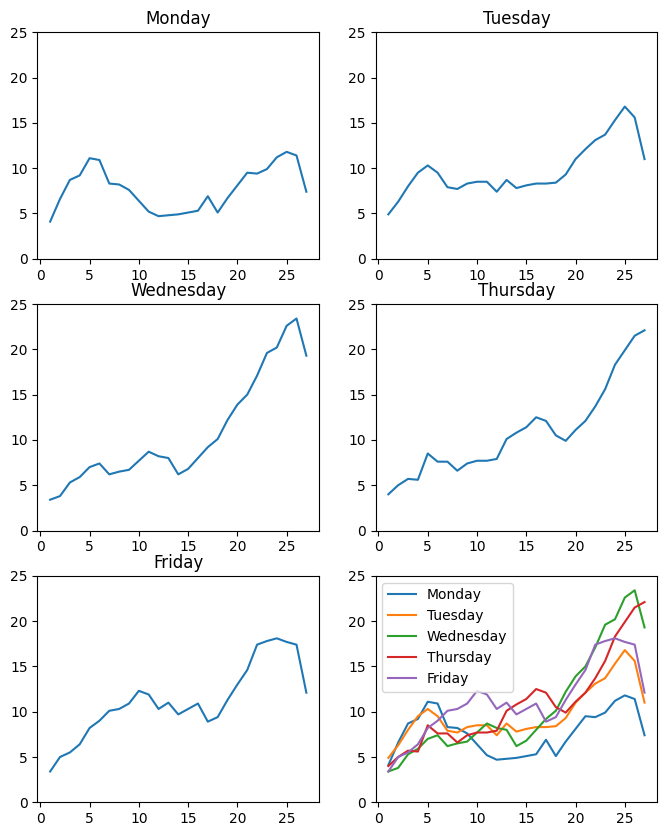

In [ ]:
plt.figure(figsize=(8,10))
for i, day in zip(range(1,6),days):
    plt.subplot(3,2,i)
    plt.plot(traffic_per_day[day]['Hour (Coded)'], traffic_per_day[day]['Slowness in traffic (%)'])
    plt.title(day)
    plt.ylim([0, 25])   # to ensure all subplots have same limits along y-axis

plt.subplot(3,2,6)
for day in days:
  plt.plot(traffic_per_day[day]['Hour (Coded)'], traffic_per_day[day]['Slowness in traffic (%)'], label=day)
  plt.ylim([0,25])

plt.legend()
plt.show()

## Relational Plots and Multiple Variables with Seaborn

Seaborn — a Python data visualization library that builds on Matplotlib.

The graphs we've built as of yet showed at most two variables (columns). **Seaborn enables us to easily show more than two variables on a graph.** Below, we see a graph with five variables.

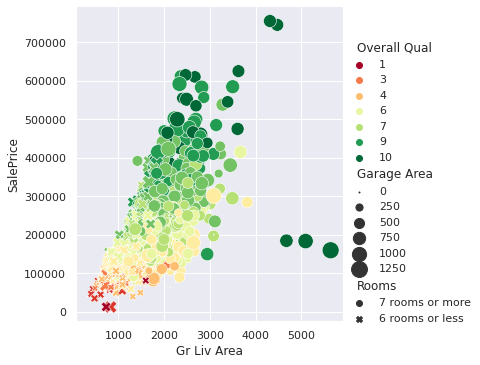

The graph that shows five variables (columns):

1. `SalePrice`: price of the sale in USD
2. `Gr Liv Area`: above grade (ground) living area in square feet
3. `Overall Qual`: quality ratings of the overall material and finish of the house
4. `Garage Area`: garage area in square feet
5. `Rooms` : number of rooms

In [ ]:
import pandas as pd
housing = pd.read_csv('/content/housing.csv')
housing.shape

(2930, 84)

We'll start by plotting only two of these variables: `SalePrice` and `Gr Liv Area`.

Call the `sns.relplot()` (Relational Plot) function to generate the plot.

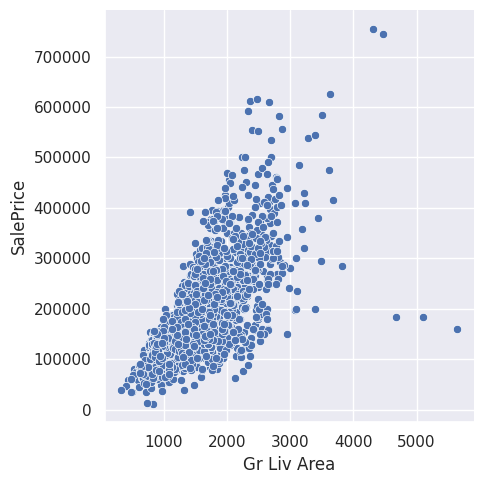

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.relplot(data=housing, # pass the dataframe in data
           y='SalePrice', x='Gr Liv Area')
plt.show()   # seaborn is built upon matplotlib, so use show() from parent library

Visually, the graph uses Matplotlib defaults. To switch to Seaborn defaults, we need to call the `sns.set_theme()` function.

We need to call the `sns.set_theme()` function before generating the plot — before calling `sns.relplot()`. Once we call `sns.set_theme()`, all subsequent graphs will inherit the Seaborn style — we only need to call this function once.

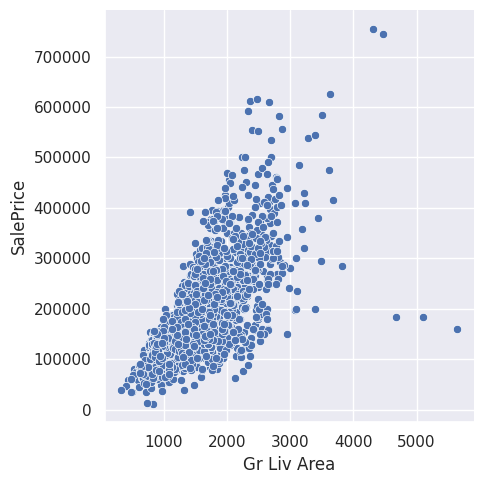

In [ ]:
sns.set_theme()
sns.relplot(data=housing, # pass the dataframe in data
           y='SalePrice', x='Gr Liv Area')
plt.show()   # seaborn is built upon matplotlib, so use show() from parent library

### Variable Representation: Colour

Notice that each **dot (also called a marker)** on the scatter plot is blue. We can **change the color intensity of the dots to represent a new variable**.

Below, we use the **hue parameter** to add the `Overall Qual` variable on the scatter plot. Recall that `Overall Qual` describes the quality ratings of the overall material and finish of the house.

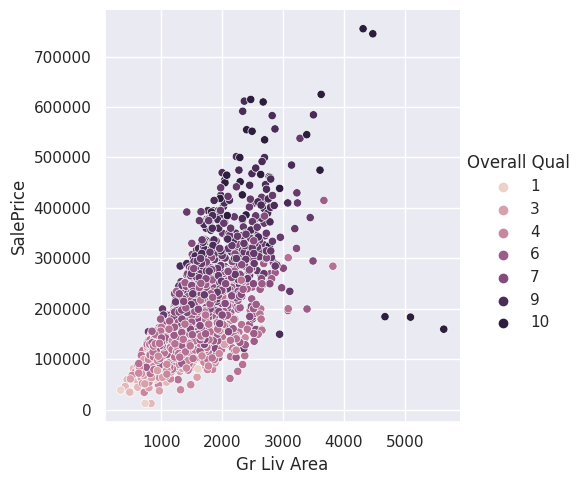

In [ ]:
sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice', hue='Overall Qual')
plt.show()

Let's say we want the colors to vary between red and green — where dark red means a rating of one and dark green means a rating of ten. We can make this change using the `palette` parameter with the `'RdYlGn'` argument.

The argument 'RdYlGn' contains three abbreviations:

1. Rd: red
2. Yl: yellow
3. Gn: green

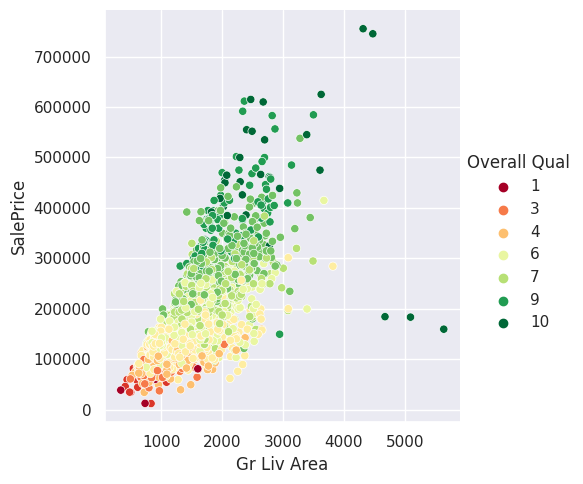

In [ ]:
sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice', hue='Overall Qual', palette='RdYlGn')
plt.show()

### Variable Representation: Size

Another element we can use to represent values is size. A dot can have a color and x- and y-coordinates, but it can also be larger or smaller. Below, we use a size representation to add the `Garage Area` variable on the graph — we use the `size` parameter. Recall that `Garage Area` describes the garage area in square feet.

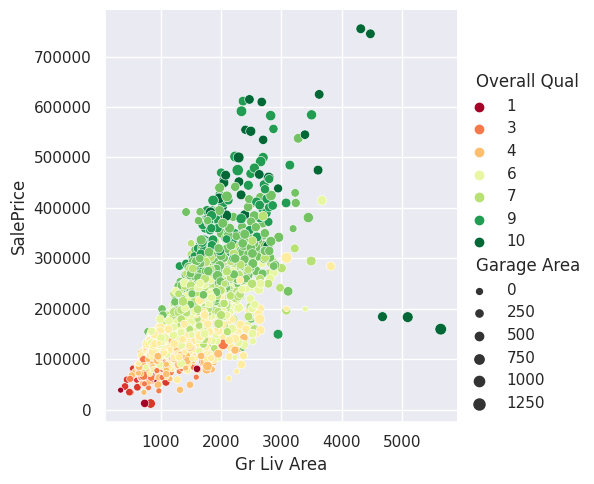

In [ ]:
sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice', hue='Overall Qual', palette='RdYlGn', size='Garage Area')
plt.show()

To make the size differences more visible, we'll increase the size range — the `sizes` parameter takes in a **tuple** specifying the **minimum** and **maximum** size.

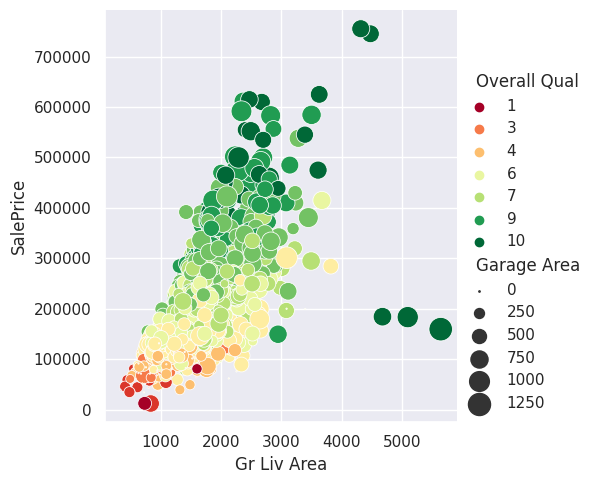

In [ ]:
sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice', hue='Overall Qual', palette='RdYlGn', size='Garage Area', sizes=(1,300))
plt.show()

The `sizes` parameter can take in a tuple only if the variable we represent is numerical — `Garage Area` is a numerical variable. The tuple in sizes represents a range.

To control the sizes for a non-numerical (categorical) variable, we need to use a list or a dict. Instead of specifying the range, we need to specify the sizes for each unique value in the variable.

The `Rooms` variable is categorical, and it has two unique values: `'7 rooms or more'`, and '`6 rooms or less'`. Below, we pass in the list [200,50] to map `'7 rooms or more'` to a size of 200 and `'6 rooms or less'` to a size of 50.

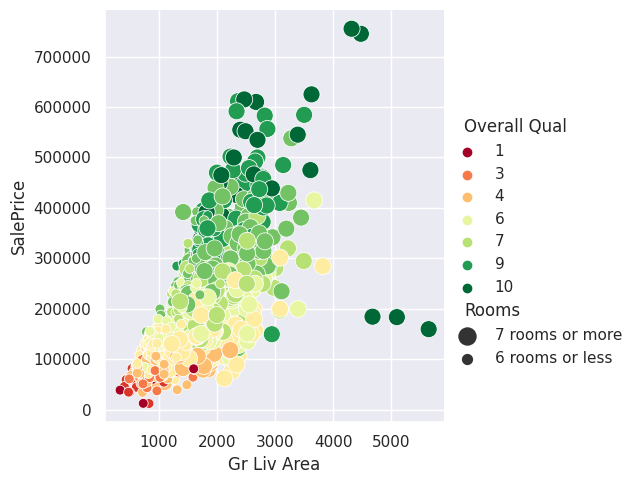

In [ ]:
sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice',
            hue='Overall Qual', palette='RdYlGn',
            size='Rooms', sizes=[150,50])
plt.show()

### Variable Representation: Shape

Another visual property we can exploit is shape. On the graph we've built, each dot has the shape of a circle. Instead of a circle, however, it could have been a triangle, a square, etc.

More generally, we call the **dots on our graphs markers**. The marker can take various shapes: circle, triangle, square, etc.

Below, we add the `Rooms` variable by changing the shape of the markers. A circle now means a house with seven rooms or more, and an "x" sign represents a house with six rooms or less. To make this change, we use the `style` parameter.

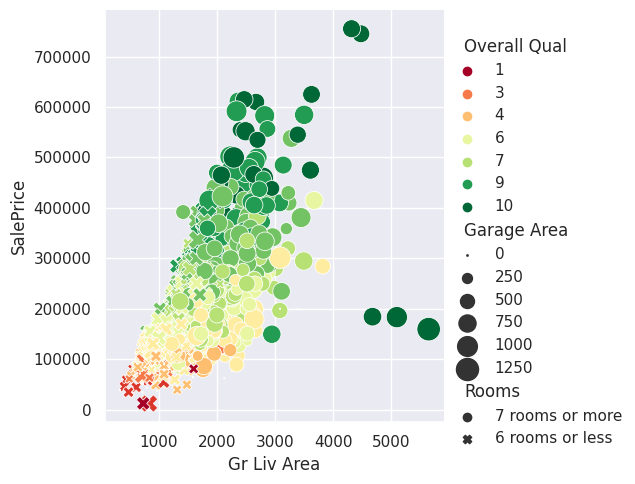

In [ ]:
sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice',
            hue='Overall Qual', palette='RdYlGn',
            size='Garage Area', sizes=(1,300),
            style='Rooms')
plt.show()

If we're not happy with Seaborn's marker choice, we can change the markers' shape. By default, Seaborn chose a circle and an "x" sign to represent the values.

Below, we add different markers using the `markers` parameter. Each marker shape has a `string` representation that we can find in the documentation referenced earlier..

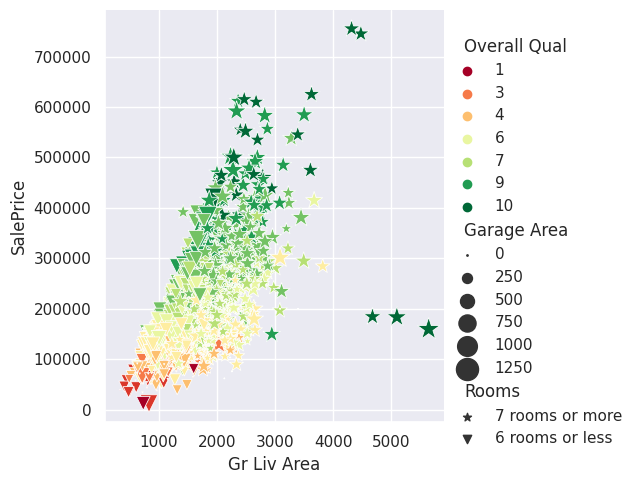

In [ ]:
sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice',
            hue='Overall Qual', palette='RdYlGn',
            size='Garage Area', sizes=(1,300),
            style='Rooms', markers=['*','v'])
plt.show()

### Variable Representation: Spatial Separation

We'll add one more variable by **spatially separating the graph** based on the values in the `Year` variable. This variable describes the year when a house was built, and it has only two values: 1999 or older and 2000 or newer. **For each value, we'll build a separate graph that will display the five variables we've already plotted**.

Below, we add the `Year` column using the `col` parameter

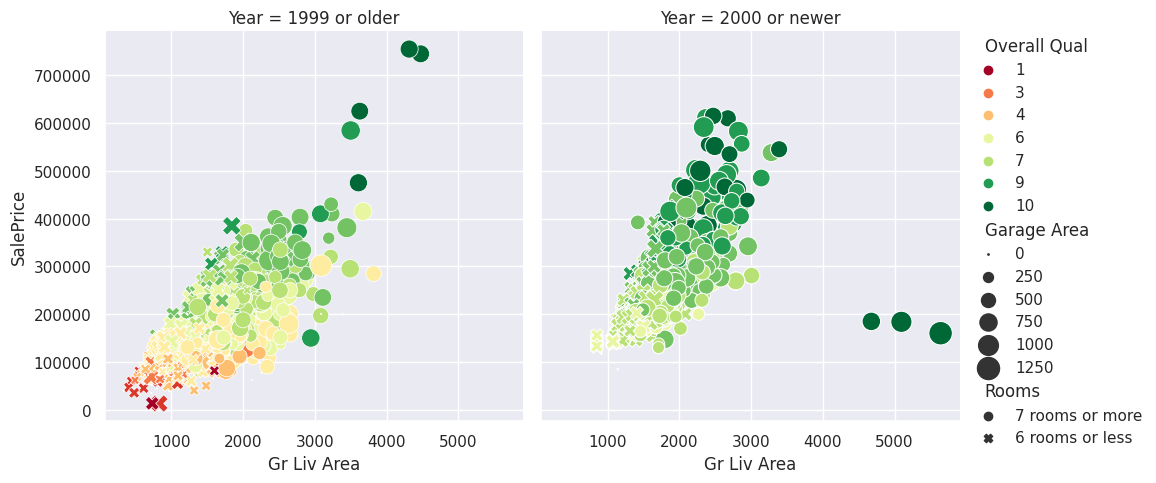

In [ ]:
sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice',
            hue='Overall Qual', palette='RdYlGn',
            size='Garage Area', sizes=(1,300),
            style='Rooms', col='Year')
plt.show()

Individually, each graph displays only five variables, but together they show six variables — the `Year` variable and the other five.

The graph we built is essentially a scatter plot. However, because it shows the relationships between so many variables, we call it a relational plot.

# Telling Stories Using Data Visualization and Information Design

## Design for an Audience

When we design graphs (and anything in general), we need **design principles** to guide us. Design principles help us in two ways:

* They generate design options.
* They help us choose among those options.

Two design principles:

**1. Familiarity** - Favour simple graphs over complicated eye-catching graphs

**2. Maximizing data elements** - ensures the audience's attention is on the data — not on structure or decorations

* The Direction of Reading - people usually start from top left and follow a zigzag pattern until they reach bottom right, while reading a graph

* Title and Subtitle - Title containing data ink and structural explanations (what the graph explains) in subtitle

* Final Touches

### Familiarity

Let's say we're data journalists, and we're working on an article about the coronavirus. Our goal is to make readers more aware of how devastating this virus is — the assumption is that we're writing the article in December 2020, when the coronavirus was still fairly new.

The **familiarity principle** typically favors simple graphs over complicated, eye-catching graphs. As data scientists, we use visuals to communicate data correctly and efficiently. Our primary aim is not to impress the audience on artistic grounds.

To display the top 20 countries by number of deaths, a horizontal bar plot should work well enough — let's assume our audience is familiar with this kind of graph.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

top20_deathtoll = pd.read_csv('top20_deathtoll.csv')
plt.barh(top20_deathtoll['Country_Other'], top20_deathtoll['Total_Deaths'])
plt.ylabel('Country')
plt.xlabel('Number of Deaths')
plt.show()

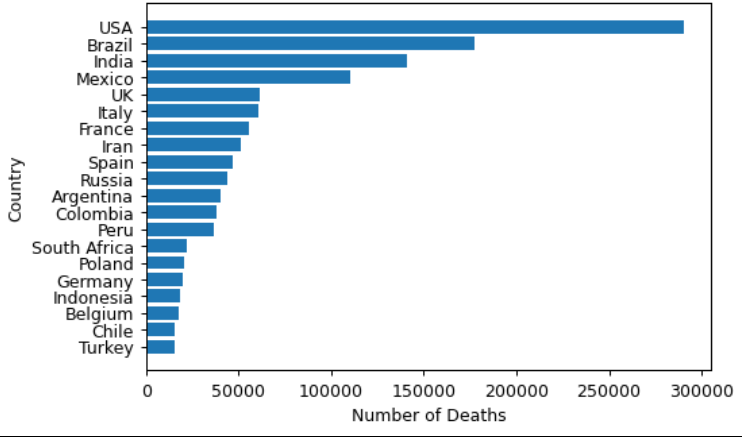

### Matplotlib Interfaces

Matplotlib has two interfaces:

1. A **functional interface**: we use functions to create and modify plots.
2. An **object-oriented (OO) interface**: we use methods to create and modify plots.

We used the functional approach when we called the function `plt.barh()`. The functional interface is simpler and easier to use. It comes in handy in the exploratory data visualization workflow, where we need to create graphs fast.

But the OO interface offers more power and flexibility in graph editing.

### OO - Interface

To create a graph using the OO interface, we use the `plt.subplots()` function, which generates an empty plot and returns a tuple of two objects; We assign the two objects inside the tuple to variables fig and ax:

In [ ]:
fig, ax = plt.subplots()
plt.show()
print(type(fig))
print(type(ax))

`<class 'matplotlib.figure.Figure'>`

`<class 'matplotlib.axes._subplots.AxesSubplot'>`

The `matplotlib.figure.Figure` object acts as a canvas on which we can add one or more plots. The `matplotlib.axes._subplots.AxesSubplot` object is the actual plot. In short, we have two objects:

* The **Figure** (the canvas)
* The **Axes** (the plot; don't confuse with "axis," which is the x- and y-axis of a plot).

To create a horizontal bar plot, we use the `Axes.barh()` method and call `plt.show()`:

In [ ]:
fig, ax = plt.subplots()
ax.barh(top20_deathtoll['Country_Other'], top20_deathtoll['Total_Deaths'])
plt.show()

We know that a large part of our audience will read the article on a mobile device. This means our graph needs to have mobile-friendly proportions: small width, larger height. Our graph currently has a small height and a larger width.

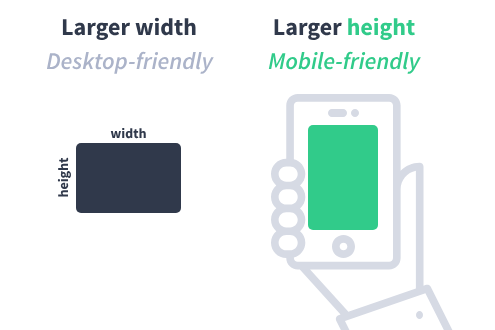

To change the proportions, we can use the figsize parameter inside the `plt.subplots(figsize=(width, height))` function:

In [ ]:
fig, ax = plt.subplots(figsize=(4.5,6))
ax.barh(top20_deathtoll['Country_Other'], top20_deathtoll['Total_Deaths'])
plt.show()

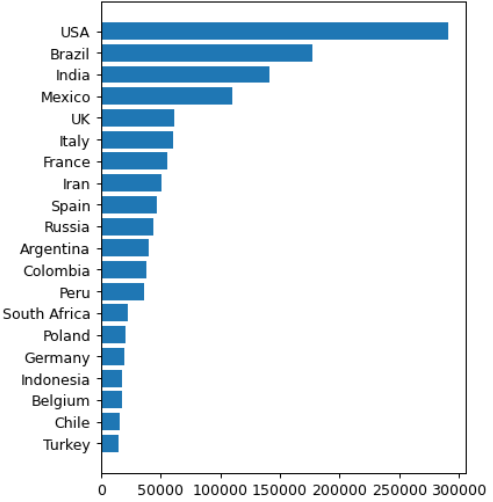

### Maximizing data elements

Generally, a graph has three elements:

**1. Data elements:** the numbers and the categories visually represented and the relationships between them.
**2. Structural elements:** the axes, the ticks, the legend, the grid, etc.
**3. Decorations:** extra colors, shapes, artistic drawings etc.

Maximizing the data elements (1) ensures the audience's attention is on the data — not on structure (2) or decorations (3).

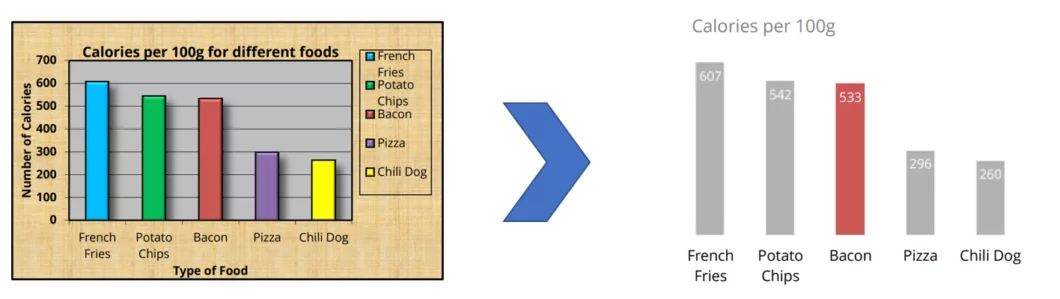

**Note:** The data elements are all present from before and after but the structural elements and the decorations are removed ensuring that the audience's attention is on the data.

From the total amount of ink used for printing a graph, some of the ink goes to show the data — that is the **data-ink**. Tufte named the principle of maximizing data elements as maximizing the data-ink ratio. The data-ink ratio is the proportion of data-ink from the total ink:

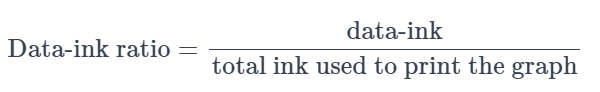

To maximize data ink, we can do the following:

1. Erase non-data ink
2. Erase redundant data-ink

#### Erase non-data ink

We begin by identifying the data-ink that we can't remove without losing information (this is the core of the graph):

* The bars
* The y-tick labels (the country names)
* The x-tick labels (the number of deaths)

There are two structural elements that constitute non-data ink — we can remove them without losing any important information:

* The axes
* The ticks

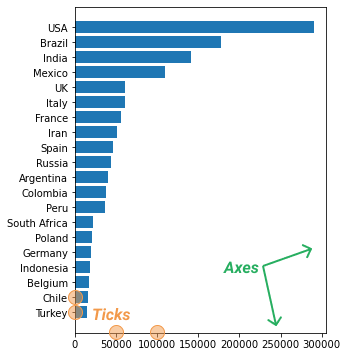

To remove the axes (also called spines), we can use the `Axes.spines[position].set_visible(bool)` method, where position is a string indicating the location of the axis: 'left', 'right', 'top', and 'bottom'.

To remove the ticks, we can use the `Axes.tick_params(bottom, top, left, right)` method.

In [ ]:
fig, ax = plt.subplots(figsize=(4.5,6))
ax.barh(top20_deathtoll['Country_Other'], top20_deathtoll['Total_Deaths'])

for location in ['left', 'right', 'bottom', 'top']:
    ax.spines[location].set_visible(False)

ax.tick_params(bottom=False, left=False)   # only need to remove the left and bottom ticks

plt.show()

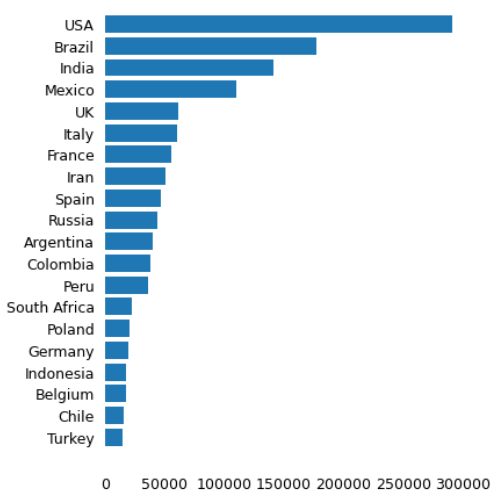

#### Erase redundant data-ink


* For our horizontal bar plot, we can make the bars less thick - To make the bars less thick, we can use the height parameter inside the `Axes.barh()` method. The height parameter has a default value of 0.8.

* and remove some of the x-tick labels (we can leave only the labels 0, 150000, and 300000), using the ` Axes.set_xticks` method.

In [ ]:
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top20_deathtoll['Country_Other'],
        top20_deathtoll['Total_Deaths'], height = 0.45)
ax.set_xticks([0,150000,300000])
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)
ax.tick_params(bottom=False, left=False)
plt.show()

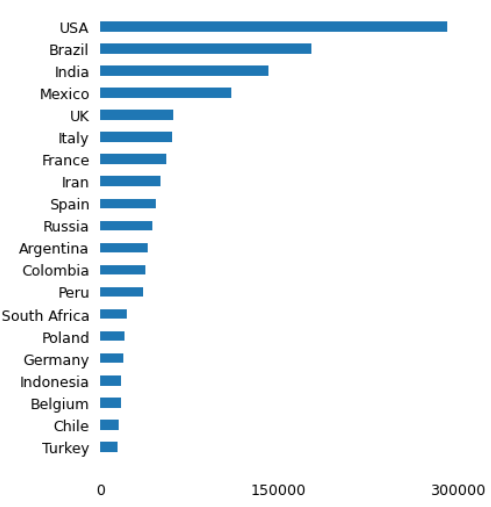

### The Direction of Reading

Another aspect that we need to consider is the audience's direction of reading. As they scroll down through our article, they will read (and look at) our graph from top to bottom. More specifically, people usually start from top left and follow a zigzag pattern until they reach bottom right.

* One problem with our graph is that the tick labels are located at the bottom. People will immediately see the country names, the bars, but they may get confused about the quantities. To address that, we're going to move the tick labels at the top of the graph using the `Axes.xaxis.tick_top()` method

* Right now, the first thing people will probably see are the x-tick labels. We want readers to focus on the data (and not the x-tick), so we'll do two things:

  1. We'll color the x-tick labels in grey so they don't stand out visually so much. `Axes.tick_params(axis='x', colors='grey')`
  2. We'll color the bars in a shade of red. `Axes.barh(color='#af0b1e')`

In [ ]:
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top20_deathtoll['Country_Other'],
        top20_deathtoll['Total_Deaths'], height = 0.45, color='#af0b1e')
ax.xaxis.tick_top()                       # to move x axis to top instead of bottom
ax.set_xticks([0,150000,300000])
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)
ax.tick_params(top=False, left=False)     # to remove the top ticks instead of the bottom ones
ax.tick_params(axis='x', colors='grey')   # Color the x-tick labels in grey
plt.show()

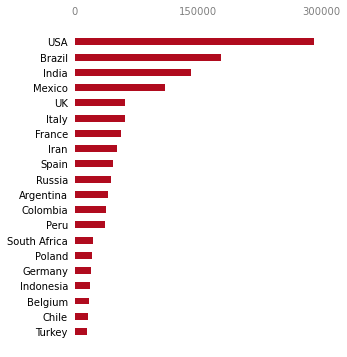

### Title and Subtitle

Instead of adding an x-axis label, we'll use the title and subtitle area to give the readers the necessary details. Generally, the **title must be data ink**. If we need to give **structural explanations** in text, we can use the **subtitle**. That's because the title is always so noticeable, and we need to leverage that to show more data (and also maximize the data-ink ratio).

* Use the **title** to show readers more data — we'll report that the death toll worldwide has surpassed 1.5M
* Add a **subtitle** that explains what the quantity describes and when the data was collected.

To add a title and a subtitle, we're going to use the `Axes.text()` method. Its arguments are:
* `x` and `y`: the coordinates that give the position of the text
* `s`: the text
* `size`: control the text size
* `weight`: enables us to bold the text

In [ ]:
fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top20_deathtoll['Country_Other'],
        top20_deathtoll['Total_Deaths'],
        height=0.45, color='#af0b1e')
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)
ax.set_xticks([0, 150000, 300000])
ax.xaxis.tick_top()
ax.tick_params(top=False, left=False)
ax.tick_params(axis='x', colors='grey')
ax.text(x=-80000, y=23.5, s='The Death Toll Worldwide Is 1.5M+', weight='bold', size=17)
ax.text(x=-80000, y=22.5, s='Top 20 countries by death toll (December 2020)', size=12)
plt.show()

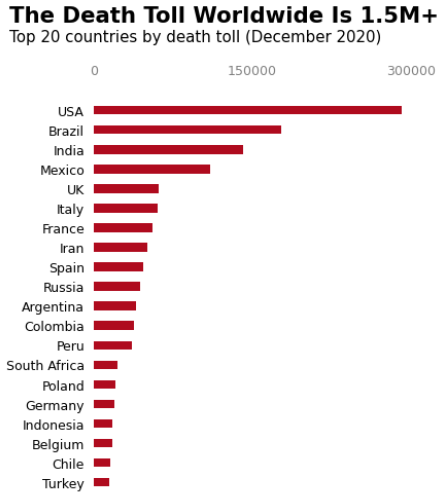

### Final Touches

First, we'll make the y-tick labels easier to read. We'll add a comma to both 150000 and 300000 to make them more readable — so people don't have to struggle to tell whether it's a 30,000 or a 300,000, for instance.

To make this change, we use the `Axes.set_xticklabels()` method.

In [ ]:
ax.set_xticklabels(['0', '150,000', '300,000'])

Next, we're going to left-align the y-tick labels (the country names) by applying a for loop over the country names using python's zip function. Thereafter, we will leverage the flexibility of matplotlib's `Axes.text()` method. First, however, we're going to remove the current labels using the `Axes.set_yticklabels()` method.

In [ ]:
ax.set_yticklabels([]) # an empty list removes the labels
country_names = top20_deathtoll['Country_Other']
for i, country in zip(range(20), country_names):
    ax.text(x=-80000, y=i-0.15, s=country)

Readers who explore the graph will try to determine the approximate death toll for each country. To help them, we're going to draw a vertical line below the 150,000 value. To do that, we use the `Axes.axvline(x)` method, where x is the x-coordinate where the line begins:

In [ ]:
ax.axvline(x=150000)

The color of the vertical line is too bright and stands out more than we want. Moreover, the line spans too far vertically and isn't on the same line with the Turkey label. To fix these problems, we're going to use the following:

* The `ymin` parameter to make it shorter — where 0 is the bottom of the plot, and 1 is the top of the plot.
* The `c` parameter to change the color to 'grey'.
* The `alpha` parameter to add transparency to the line.

In [ ]:
ax.axvline(x=150000, ymin=0.045, c='grey', alpha=0.5)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

top20_deathtoll = pd.read_csv('top20_deathtoll.csv')

fig, ax = plt.subplots(figsize=(4.5, 6))
ax.barh(top20_deathtoll['Country_Other'],
        top20_deathtoll['Total_Deaths'],
        height=0.45, color='#af0b1e')
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)
ax.set_xticks([0, 150000, 300000])
ax.set_xticklabels(['0', '150,000', '300,000'])
ax.xaxis.tick_top()
ax.set_yticklabels([]) # an empty list removes the labels
country_names = top20_deathtoll['Country_Other']
for i, country in zip(range(20), country_names):
    ax.text(x=-80000, y=i-0.15, s=country)
ax.tick_params(top=False, left=False)
ax.tick_params(axis='x', colors='grey')
ax.text(x=-80000, y=23.5,
        s='The Death Toll Worldwide Is 1.5M+',
        weight='bold', size=17)
ax.text(x=-80000, y=22.5,
        s='Top 20 countries by death toll (December 2020)',
        size=12)
ax.axvline(x=150000, ymin=0.045, c='grey', alpha=0.5)
plt.show()

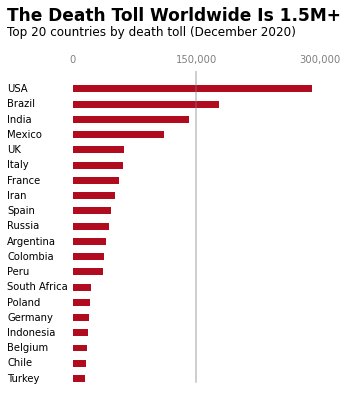

## Storytelling Data Visualization

Our graph is static: the information we present doesn't show any element of change.

There's nothing wrong with showing facts or presenting static information, but that's not a story. To create a data story, we need to **wrap numerical facts into events that show change**.

For our example above, we can take the particular case of the United States and show how the death toll has changed since the beginning of the pandemic. Below, we see an example of a data story:

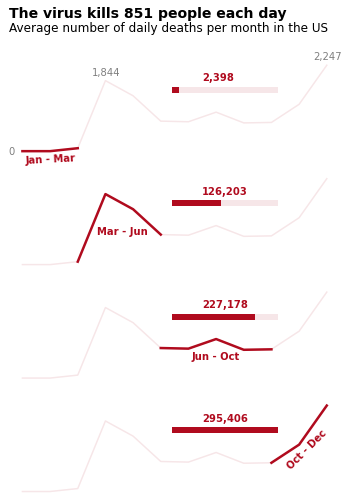

### Modifying Line Plot

The visualization is a grid chart composed of four different line plots — with a configuration of four rows by one column.

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                         figsize=(6,8))
plt.show()

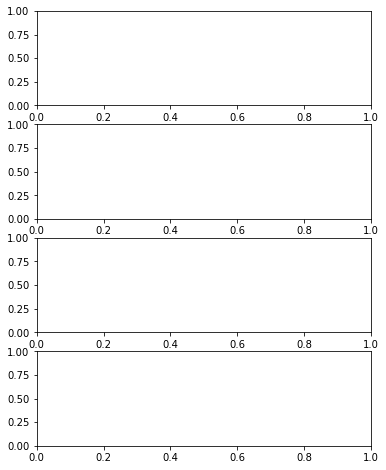

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                         figsize=(6,8))
axes = [ax1, ax2, ax3, ax4]
for ax in axes:
  ax.plot(death_toll['Month'], death_toll['New_deaths'])

plt.show()

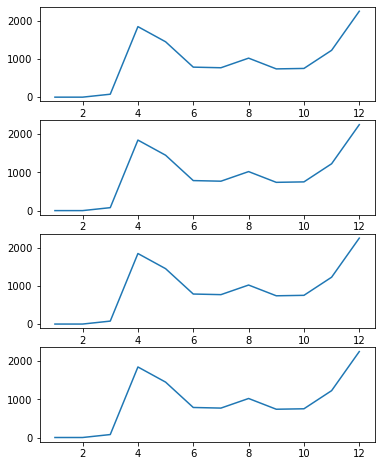

We remove the x-ticks and y-ticks labels, spines, all ticks for maximizing data ink:

In [ ]:
death_toll = pd.read_csv('covid_avg_deaths.csv')
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                         figsize=(6,8))
axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.plot(death_toll['Month'], death_toll['New_deaths'])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(left=False, bottom=False)
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)
plt.show()

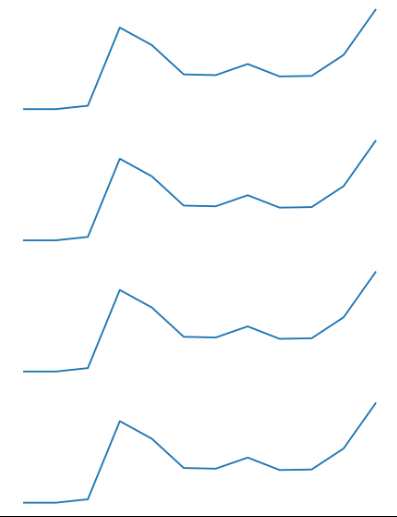

The storytelling data visualization we first showed emphasizes four periods:

* January–March
* March–June
* June–October
* October–December

To highlight these four periods, we begin by coloring all plots in a shade of red. Then, we increase their transparency by using the `alpha` parameter.

In [ ]:
axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.plot(death_toll['Month'], death_toll['New_deaths'],
            color='#af0b1e', alpha=0.1)           # alpha ensures higher transparency, i.e, it has a lighter shade

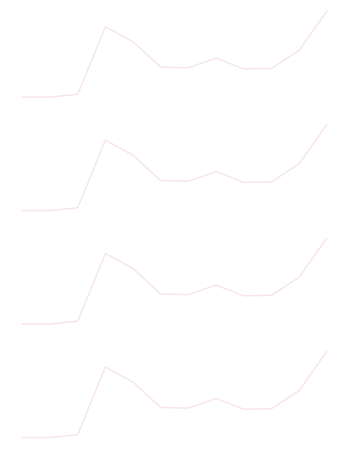

Now, we draw separate line plots on top of the current ones. We begin by drawing the first one — we use the same color and increase the line width using the `linewidth` parameter.

In [ ]:
ax1.plot(death_toll['Month'][:3], death_toll['New_deaths'][:3],
         color='#af0b1e', linewidth=2.5)
ax2.plot(death_toll['Month'][2:6], death_toll['New_deaths'][2:6],
         color='#af0b1e', linewidth=2.5)
ax3.plot(death_toll['Month'][5:10], death_toll['New_deaths'][5:10],
         color='#af0b1e', linewidth=2.5)
ax4.plot(death_toll['Month'][9:], death_toll['New_deaths'][9:],
         color='#af0b1e', linewidth=2.5)
plt.show()

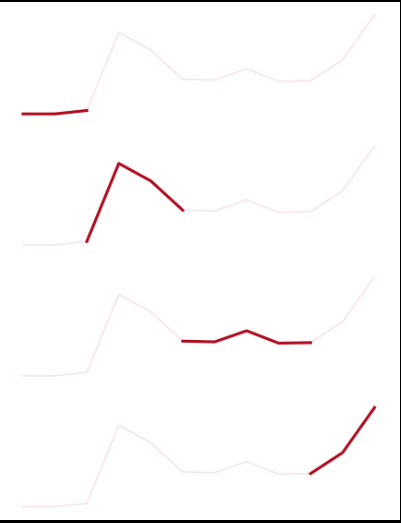

### Adding Structural Elements

Right now, our graph has a very high data-ink ratio, which is good. Except for the four highlighted periods, we can't remove anything without losing important data.

However, we still need to add a few structural elements so the audience can understand the visualization.

First, we're going to show the quantities by adding three labels on the first plot — we do this using the A`xis.text()` method. **We arrived at the exact x- and y-coordinates you see below through a process of trial and error.**


In [ ]:
ax1.text(0.5, -80, '0', alpha=0.5)
ax1.text(3.5, 2000, '1,844', alpha=0.5)
ax1.text(11.5, 2400, '2,247', alpha=0.5)

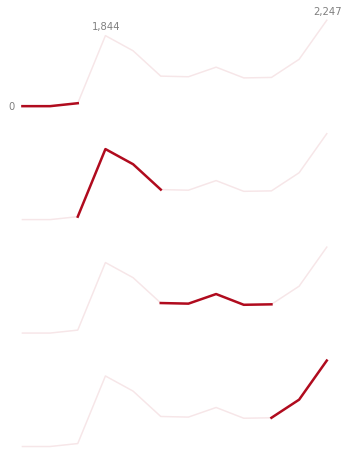

The three labels give the audience a sense of the magnitude and the range of the quantities. We only want to show people a trend, so these three labels are enough. The other three plots are identical, so we don't need to add more ink.

The three labels we added correspond to the quantities on the y-axis (the average number of daily deaths per month). On the x-axis, we have month names, and we need to make that clear.

Below, we add the 'Jan-Mar' label using `Axes.text()`. Specifically, notice the rotation parameter we use to slightly rotate the text.

In [ ]:
ax1.text(1.1, -300, 'Jan - Mar', color='#af0b1e',
         weight='bold', rotation=3)
ax2.text(3.7, 800, 'Mar - Jun', color='#af0b1e',
         weight='bold')
ax3.text(7.1, 500, 'Jun - Oct', color='#af0b1e',
         weight='bold')
ax4.text(10.5, 600, 'Oct - Dec', color='#af0b1e',
         weight='bold', rotation=45)

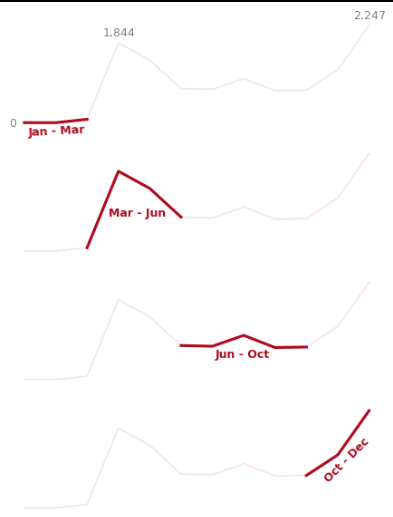

**Title and Subtitle**

In [ ]:
ax1.text(0.5, 3500, size=14, weight='bold', s='The virus kills 851 people each day')
ax1.text(0.5, 3150, size=12, s='Average number of daily deaths per month in the US')

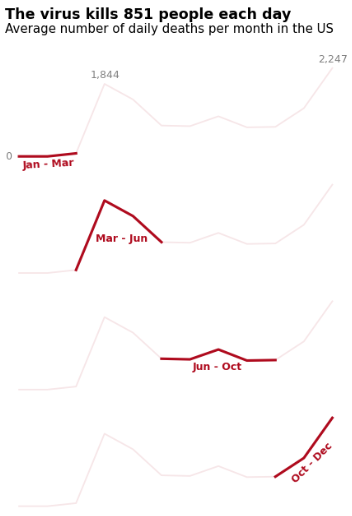

### Adding progress bar

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

death_toll = pd.read_csv('covid_avg_deaths.csv')
deaths = [2387, 126203, 227178, 295406]
proportions = [round(death/295406, 2) for death in deaths]
xmax_vals = [round(0.5 + proportion * 0.3, 3) for proportion in proportions]

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                        figsize=(6,8))
axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.plot(death_toll['Month'], death_toll['New_deaths'],
            color='#af0b1e', alpha=0.1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(bottom=0, left=0)
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)

ax1.plot(death_toll['Month'][:3], death_toll['New_deaths'][:3],
         color='#af0b1e', linewidth=2.5)
ax1.text(0.5, -80, '0', alpha=0.5)
ax1.text(3.5, 2000, '1,844', alpha=0.5)
ax1.text(11.5, 2400, '2,247', alpha=0.5)
ax1.text(1.1, -300, 'Jan - Mar', color='#af0b1e',
         weight='bold', rotation=3)
ax1.text(0.5, 3500, 'The virus kills 851 people each day',
         size=14, weight='bold')
ax1.text(0.5, 3150, 'Average number of daily deaths per month in the US',
         size=12)

ax2.plot(death_toll['Month'][2:6], death_toll['New_deaths'][2:6],
         color='#af0b1e', linewidth=2.5)
ax2.text(3.7, 800, 'Mar - Jun', color='#af0b1e', weight='bold')


ax3.plot(death_toll['Month'][5:10], death_toll['New_deaths'][5:10],
         color='#af0b1e', linewidth=2.5)
ax3.text(7.1, 500, 'Jun - Oct', color='#af0b1e', weight='bold')


ax4.plot(death_toll['Month'][9:12], death_toll['New_deaths'][9:12],
         color='#af0b1e', linewidth=2.5)
ax4.text(10.5, 600, 'Oct - Dec', color='#af0b1e', weight='bold',
        rotation=45)

for ax, xmax, death in zip(axes, xmax_vals, deaths):
    ax.axhline(y=1600, xmin=0.5, xmax=0.8,
               linewidth=6, color='#af0b1e',
               alpha=0.1)
    ax.axhline(y=1600, xmin=0.5, xmax=xmax,
               linewidth=6, color='#af0b1e')
    ax.text(7.5, 1850, format(death, ','),
            color='#af0b1e', weight='bold')

plt.show()

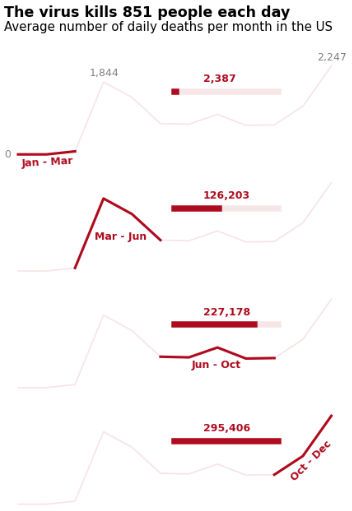

## Gestalt Principles and Pre-Attentive Attributes

### 4 Gestalt Principles

Gestalt principles tell us what sort of pattern we can expect people to see when we show them our data visualizations.

**4 Gestalt Principles:**

1. Proximity
2. Similarity
3. Enclosure
4. Connection

**Principle of Proximity**:
* When we see distinct objects close to each other, we perceive them as a group. We perceive four distinct line plots — along with their progress bars and highlighted periods.
* That's because the individual elements of each group (the lines, the progress bars, the highlighted periods) are closer to each other compared to those of the other groups.

**Principle of Similarity**:
* Generally, our perception groups together individual elements that are similar to one another.
* Similarity can apply to color, shape, size, or other visual properties.

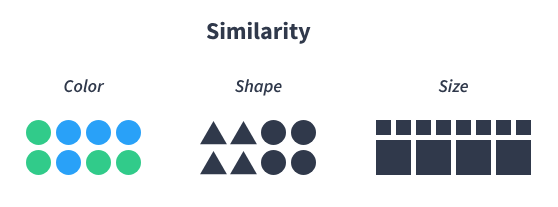

* Below, we expect people to see four different line plots based on the principle of proximity. Based on similarity of shape, however, we expect them to realize that they are seeing four variations of the same plot. This enables us to only add x-tick labels to the first plot and maximize the data-ink ratio.

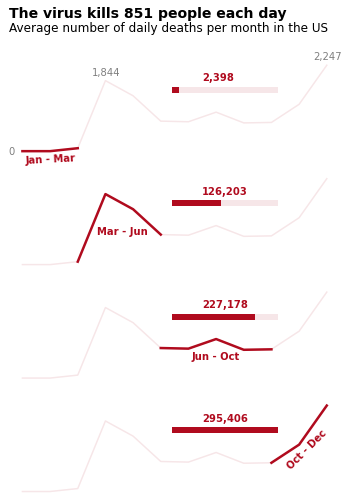

**Principle of Enclosure**:

* When we see a set of distinct elements enclosed inside a visual form, we perceive them as part of the same group.

* In data visualization, enclosure comes in handy when we want to separate or draw attention to certain portions of a graph. Below, we highlight the third line plot using enclosure (let's say we want to draw attention to the third plot).

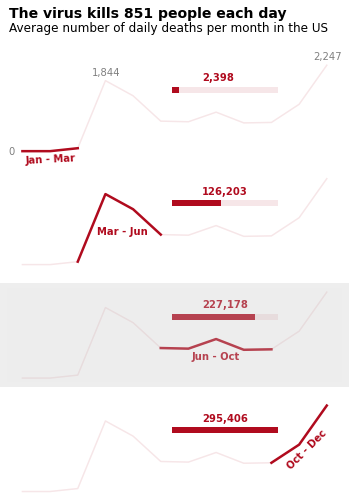

**Principle of Connection**:

* When we see distinct objects connected by some kind of a visual form (usually a line), we perceive them as part of the same group.
* Below, we use this principle to show a connection between Mexico and Argentina (let's say we need to make a point about this connection).

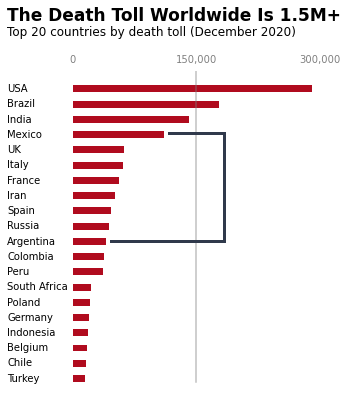

### Visual Hierarchy

* Connection is typically stronger than proximity and similarity.

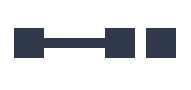

* We perceive the first two squares as belonging together because of the line that connects them. Connection cancels out the space between them — in other words, connection is stronger than proximity.

* Because some of the principles are stronger than others, a visual hierarchy develops. When we create data visualizations, we need to create with visual hierarchy in mind. If connection cancels out similarity without us realizing, we can communicate incorrect information.

* Connection and enclosure typically have similar strengths. What makes the difference is the properties of the visual objects we use to create the enclosure and the connection. Thicker lines and stronger color can mean a stronger connection. Dotted lines along with a strong-colored enclosing form can mean stronger enclosure and weaker connection.

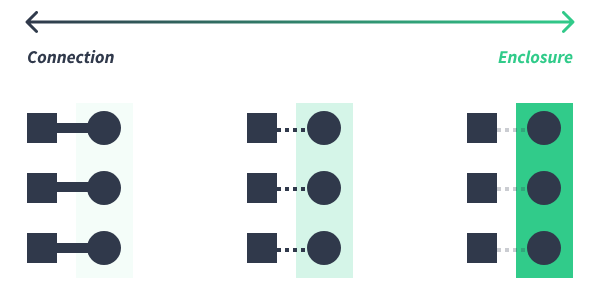

### Pre-Attentive Attributes

The way we direct our attention on an image is also non-random. Let's start by examining the image below:

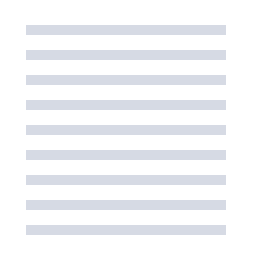

We see a few parallel horizontal lines, and except for their position in space, they are identical. Nothing really stands out. Let's now look at this image:

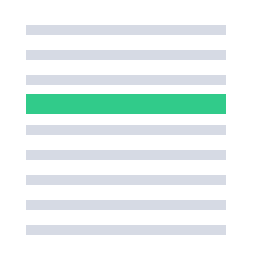

The thicker green line instantly draws our attention because it's different from the rest. It signals where to look. We see a similar visual effect in the horizontal bar plot below:

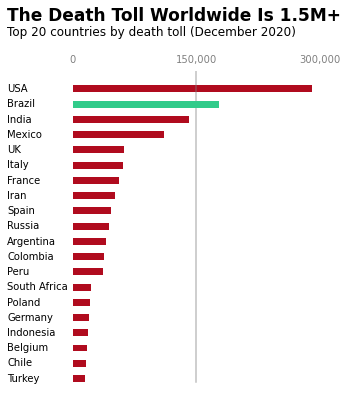

We focus our attention on Brazil because the color of its corresponding bar is different.

A visual object that is different from the rest stands out and signals where to look. **We can use this visual effect to guide our audience's attention.** If people look where we want them to, we can present information more efficiently.

Our brains typically become aware of these different objects before we consciously direct our attention toward them. Because they come before conscious attention, we call them pre-attentive ("pre" means "before"). Below, we see some of the pre-attentive attributes we can use in our data visualizations.

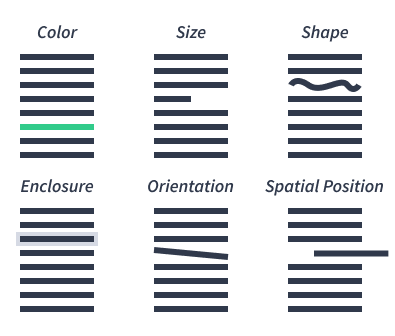

Pre-attentive attributes can become inefficient if we overuse them, so we must be very selective about what we make different. Below, for instance, nothing stands out.

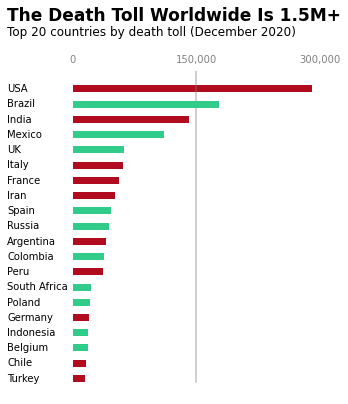

## Miscellaneous

Combination of blue-orange used in (bar) graphs:
* `color = '#FF5733'` : orange
* `color = '#3776ab'` : blue